# engagement time이 길다는 데이터 하나만으로 유저에 대한 게임의 만족도가 높다고 할 수 있을까?

## 부제 : pic-fit과 cubeout의 비교

- 현재 데이터 분석 중, 게임의 벤치마크는 cubeout을 기준으로 하고 있음. 그 이유는 cubeout이 퍼포먼스가 준수하기 때문.

### 분석 배경

- pic-fit의 유저 로그를 보던 중, 게임의 스테이지를 끝낸 후, 삭제하는 패턴이 자주 등장하였음. 이러한 현상을 발견하고, 유저들이 실제로 얼마나 삭제하고 있는지를 확인하며, 다른 게임과 비교하면서, 어느 정도 심각한 수준인지를 파악하기 위해서 이 레포트를 작성하였음.

### 본문

#### pic-fit과 cubeout의 체류시간 비교

![스크린샷](resoureces/Screenshot%202025-10-02%20at%204.00.28%20PM.png)

큐브아웃과 픽핏의 평균체재시간(전기간)은 약 16분 전후로 비슷한 수준을 유지하고 있음. 중앙값에서 약 5분 간의 차이를 보이고 있으나, 이것은 여러 요인(특히, 게임의 고유 특성)에 의한 것이므로, 이번 레포트에서는 스킵하겠음.
직관적으로 생각하였을 때, (전기간)평균체재시간이 비슷한 퍼포먼스를 보이고 있다면, 이 게임의 퍼포먼스, 유저에 대한 만족도는 비슷한 수준의 퍼포먼스를 발휘하고 있을 것이라고 생각할 수 있음.
실제로 그러한가?

#### 큐브아웃과 픽핏의 삭제률 차이

![스크린샷](/Users/junlee789/Desktop/DataAnalyst/output.png)

1일차에서, pic-fit은 약 45%의 유저가 삭제. cubeout은 32.2%로 약 13%의 차이가 존재. 즉, 체류시간이 비슷한 퍼포먼스를 보이는 반면에, 삭제률에서 큰 차이를 보이고 있음.

이러한 것은 여러 가지 원인에 대한 가설

가설 1. 컨텐츠 소비 속도
- 

가설 2. 기대치 vs 현실 (실망 요인)
- 

가설 3. 게임 난이도 커브
- 스테이지 8 수퍼맨 -> 

가설 4. 목적 달성 vs 습관 형성

- 유저의 게임 리텐션률을 높이는 방법은, 유저의 궁금증을 해소해서 도파민을 자극시키는 것. 즉, 게임을 계속하고 싶어진다는 기분, 다음 스테이지가 궁금해진다는 기분을 자극하는 것이 중요. pic-fit의 경우, 다른 디자인을 차용하고, 내 주관적인 느낌으로는 다음 스테이지에 대한 궁금하다는 주관적인 기분은 적었음.

### 결론

### 세줄요약

### 기술적 측면

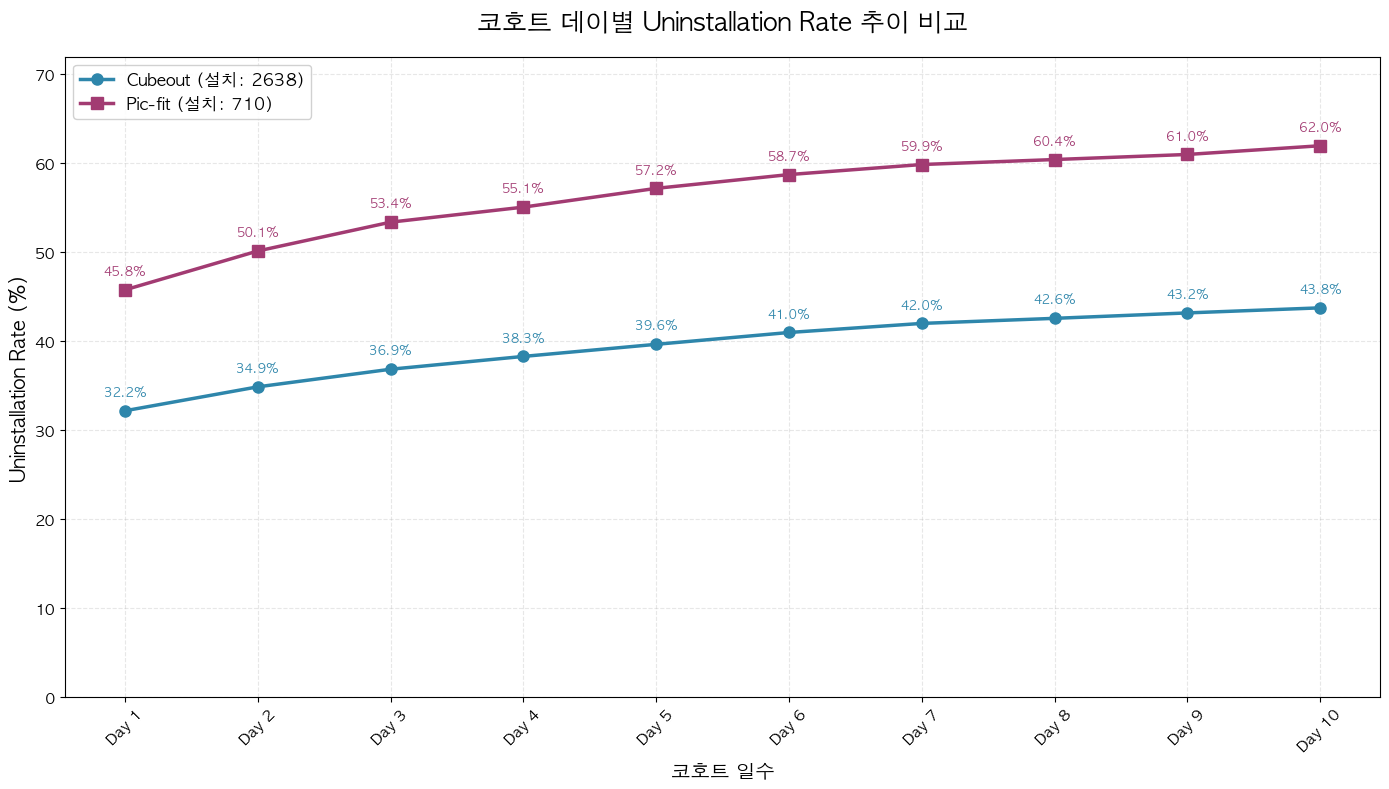

📊 Uninstallation Rate 통계 요약

[Cubeout]
  - 총 설치 수: 2,638
  - Day 1 삭제율: 32.18%
  - Day 10 삭제율: 43.75%
  - 증가폭: 11.57%p

[Pic-fit]
  - 총 설치 수: 710
  - Day 1 삭제율: 45.77%
  - Day 10 삭제율: 61.97%
  - 증가폭: 16.20%p

[비교]
  - Day 1 차이: 13.59%p (Pic-fit이 더 높음)
  - Day 10 차이: 18.22%p (Pic-fit이 더 높음)


In [1]:
# csv 파일 읽은 후, 데이터 시각화

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# 한글 폰트 설정 (MacOS)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# CSV 파일 읽기
cubeout_df = pd.read_csv('resoureces/cubeout retention and uninstallation rate.csv')
picfit_df = pd.read_csv('resoureces/pic-fit retention and uninstallation rate.csv')

# Uninstall 데이터만 추출
cubeout_uninstall = cubeout_df[cubeout_df['metric_type'] == 'Uninstall'].iloc[0]
picfit_uninstall = picfit_df[picfit_df['metric_type'] == 'Uninstall'].iloc[0]

# Day별 uninstall rate 추출
days = [f'd{i}_rate' for i in range(1, 11)]
day_labels = [f'Day {i}' for i in range(1, 11)]

cubeout_rates = [cubeout_uninstall[day] for day in days]
picfit_rates = [picfit_uninstall[day] for day in days]

# 시각화
plt.figure(figsize=(14, 8))
plt.plot(day_labels, cubeout_rates, marker='o', linewidth=2.5, markersize=8, 
         label=f'Cubeout (설치: {int(cubeout_uninstall["total_installs"])})', color='#2E86AB')
plt.plot(day_labels, picfit_rates, marker='s', linewidth=2.5, markersize=8, 
         label=f'Pic-fit (설치: {int(picfit_uninstall["total_installs"])})', color='#A23B72')

# 그래프 꾸미기
plt.title('코호트 데이별 Uninstallation Rate 추이 비교', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('코호트 일수', fontsize=14, fontweight='bold')
plt.ylabel('Uninstallation Rate (%)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12, loc='upper left', framealpha=0.9)
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Y축 범위 설정
plt.ylim(0, max(max(cubeout_rates), max(picfit_rates)) + 10)

# 각 포인트에 값 표시
for i, (day, cubeout_val, picfit_val) in enumerate(zip(day_labels, cubeout_rates, picfit_rates)):
    plt.text(i, cubeout_val + 1.5, f'{cubeout_val:.1f}%', ha='center', va='bottom', 
             fontsize=9, color='#2E86AB', fontweight='bold')
    plt.text(i, picfit_val + 1.5, f'{picfit_val:.1f}%', ha='center', va='bottom', 
             fontsize=9, color='#A23B72', fontweight='bold')

plt.tight_layout()
plt.show()

# 통계 요약 출력
print("=" * 60)
print("📊 Uninstallation Rate 통계 요약")
print("=" * 60)
print(f"\n[Cubeout]")
print(f"  - 총 설치 수: {int(cubeout_uninstall['total_installs']):,}")
print(f"  - Day 1 삭제율: {cubeout_rates[0]:.2f}%")
print(f"  - Day 10 삭제율: {cubeout_rates[-1]:.2f}%")
print(f"  - 증가폭: {cubeout_rates[-1] - cubeout_rates[0]:.2f}%p")
print(f"\n[Pic-fit]")
print(f"  - 총 설치 수: {int(picfit_uninstall['total_installs']):,}")
print(f"  - Day 1 삭제율: {picfit_rates[0]:.2f}%")
print(f"  - Day 10 삭제율: {picfit_rates[-1]:.2f}%")
print(f"  - 증가폭: {picfit_rates[-1] - picfit_rates[0]:.2f}%p")
print(f"\n[비교]")
print(f"  - Day 1 차이: {picfit_rates[0] - cubeout_rates[0]:.2f}%p (Pic-fit이 더 높음)")
print(f"  - Day 10 차이: {picfit_rates[-1] - cubeout_rates[-1]:.2f}%p (Pic-fit이 더 높음)")
print("=" * 60)
